# Insurance Claims- Fraud Detection

### Problem Statement:
    
#### Business case:
    
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# First let us import the libraries

In [1]:
import pandas as pd
import numpy as np

#importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
df.sample(15)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
926,211,38,752504,15-05-1997,IN,250/500,1000,1055.09,0,433250,...,YES,91520,8320,16640,66560,BMW,X6,2005,Y,NaN
97,29,25,235220,01-11-2014,IL,250/500,2000,1352.83,0,464959,...,YES,64890,7210,7210,50470,Nissan,Pathfinder,2013,Y,NaN
75,120,35,116700,02-02-2001,OH,100/300,1000,1425.54,0,475847,...,NO,51210,11380,5690,34140,Ford,Fusion,2010,N,NaN
284,189,36,967756,28-04-2007,OH,250/500,2000,1388.58,0,459122,...,YES,79560,13260,13260,53040,Ford,Escape,2009,N,NaN
592,253,41,228403,20-04-2004,IN,100/300,1000,1435.09,0,471519,...,?,56610,6290,6290,44030,Chevrolet,Tahoe,1995,N,NaN
525,41,26,619589,28-03-2006,IL,100/300,1000,1383.13,0,618405,...,?,6890,530,1060,5300,Jeep,Grand Cherokee,1997,N,NaN
980,245,40,908935,11-12-2009,IL,500/1000,1000,1361.45,0,604833,...,YES,82170,7470,7470,67230,Suburu,Forrestor,1999,N,NaN
645,249,43,577858,16-09-1990,OH,100/300,2000,1148.58,0,475524,...,YES,57100,5710,5710,45680,Honda,CRV,2014,N,NaN
139,124,32,756054,06-06-1992,IL,250/500,1000,1198.15,0,447925,...,YES,73560,12260,12260,49040,BMW,X5,1995,N,NaN
37,289,49,933293,03-02-1993,IL,500/1000,2000,1222.48,0,620757,...,YES,5330,1230,820,3280,Suburu,Legacy,2001,N,NaN


# Exploratory Data Analysis (EDA)

In [7]:
df.shape

(1000, 40)

- We can see that our dataset is having 1000 rows and 40 columns.

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

- Above mentioned are the 40 columns of our dataset.

### 'fraud_reported' column is our target variable.

In [9]:
# Lets check the datatypes:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [10]:
# Lets us check the information and count of dtypes in the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- We can see that our dataset is having 21 object datatypes and 19 numerical datatypes.

### Let us seperate the numerical and object datatypes:

In [11]:
object_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        object_datatype.append(i)
object_datatype

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [12]:
numerical_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_datatype.append(i)
numerical_datatype

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 '_c39']

#### From above observations we can say that column '_c39' has no input data, it consists of all NAN data , so we will drop it.

In [13]:
df.drop('_c39',axis=1,inplace=True)

In [14]:
numerical_cols=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_cols.append(i)
numerical_cols

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

# Null Values

In [15]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

- There are no null values in our dataset.

<AxesSubplot:>

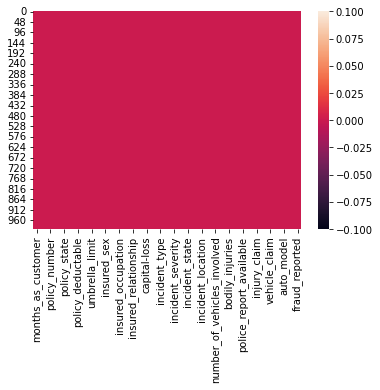

In [16]:
# Let us visualize the null values using heatmap:
sns.heatmap(df.isnull())

# Checking duplicate Values

In [17]:
df.duplicated().sum()

0

- There are no duplicate values in our dataset.

# Unique Values

In [18]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

#### 'fraud_reported' is our target variable and it has 2 unique values, i.e is of type 'Yes' and 'No', so we can say that this is a problem of classification.

# we can see that policy number and incident location both has 1000 unique data in it, we can simply drop this 2 columns as it do not give much input to our dataset.

In [19]:
df.drop('incident_location',axis=1,inplace=True)

In [20]:
df.drop('policy_number',axis=1,inplace=True)

In [21]:
# Let us check the value counts of our target variable:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

- We can see that our data in target variable is imbalanced, we will balance it while building the model.

In [22]:
# Let us check the value counts of dataset:

for columns in df:
    print(columns)
    print(df[columns].value_counts())
    print("="*120)

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
policy_csl
250/500     351
100/300     349
500/1000    300
Name: poli

- We can see for columns 'police_report_available','property_damage' and 'collision_type' there are values like '?' in it, we will work on it and fill the data in coming steps.

In [23]:
# After dropping some columns, let us check again the info of our dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

Now we can see that our data is having 17 numerical dtypes and 20 object dtypes.

# Statistical Data

In [24]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


- Count of all columns is 1000 which confirms that there are no missing data.
- All data is distributed well.

In [25]:
# Lets check all the statistical data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.948,9.140287,19.0,32.0,38.0,44.0,64.0
policy_bind_date,1000,951,01-01-2006,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,3,250/500,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1136.0,611.864673,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,NaN,NaN,NaN,1101000.0,2297406.598118,-1000000.0,0.0,0.0,0.0,10000000.0
insured_zip,1000.0,NaN,NaN,NaN,501214.488,71701.610941,430104.0,448404.5,466445.5,603251.0,620962.0
insured_sex,1000,2,FEMALE,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Now we are able to see all the data columns in vertical and statistical columns in horizontal.

- In this dataset we have the details of an automobile insurance policy along with the customer details. It also has the details of the accident on the basis of which the insurance claims have been made.

# Data Pre-Processing

In [26]:
# Firstly lets convert the dates of 'policy_bind_date' and 'incident_date' seperately to day-month-year.

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)

df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

In [27]:
# dropping the original Date columns after separating the required outputs
df.drop(columns = ['policy_bind_date','incident_date'], axis=1, inplace=True)

In [28]:
# Now as we have seen previously that some of the columns had '?' as its data, so now lets replace this data with some useful input data:

df['collision_type'] = df['collision_type'].replace('?', 'No idea')
df['property_damage'] = df['property_damage'].replace('?', 'No idea')
df['police_report_available'] = df['police_report_available'].replace('?', 'No idea')

# Encoding the categorical object datatype columns

In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
0,328,48,2.0,1.0,1000,1406.91,0.000000,13.052226,1.0,4.0,...,10.0,1.0,2004,1,17,10,2014,25,0.693147,2015
1,228,42,1.0,1.0,2000,1197.22,15.424949,13.056602,1.0,4.0,...,8.0,12.0,2007,1,27,6,2006,21,0.693147,2015
2,134,29,2.0,0.0,2000,1413.14,15.424949,12.973011,0.0,6.0,...,4.0,30.0,2007,0,9,6,2000,22,1.098612,2015
3,256,41,0.0,1.0,2000,1415.74,15.607270,13.318124,0.0,6.0,...,3.0,34.0,2014,1,25,5,1990,1,2.397895,2015
4,228,44,0.0,2.0,1000,1583.91,15.607270,13.322373,1.0,0.0,...,0.0,31.0,2009,0,6,6,2014,17,1.098612,2015


In [30]:
object_cols=[]

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        object_cols.append(i)
object_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [31]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
def ordinal_encoder(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encoder(df, object_cols)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,10.0,1.0,2004,1,17,10,2014,25,1,2015
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,8.0,12.0,2007,1,27,6,2006,21,1,2015
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,4.0,30.0,2007,0,9,6,2000,22,2,2015
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,3.0,34.0,2014,1,25,5,1990,1,10,2015
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,0.0,31.0,2009,0,6,6,2014,17,2,2015


# Checking Outliers using boxplot

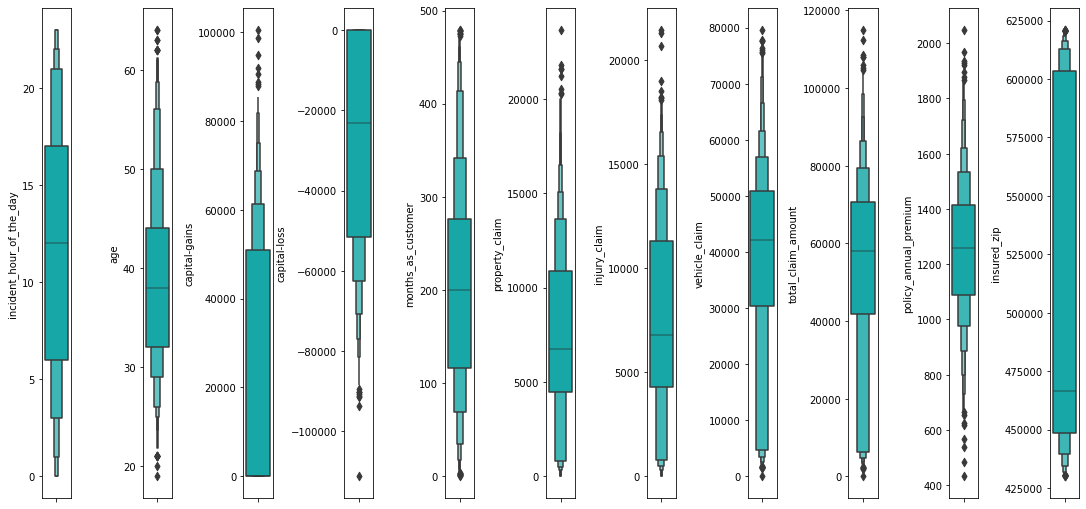

In [32]:
col = ['incident_hour_of_the_day', 'age', 'capital-gains', 'capital-loss', 'months_as_customer', 'property_claim',
       'injury_claim', 'vehicle_claim', 'total_claim_amount', 'policy_annual_premium', 'insured_zip']

plt.style.use('fast')

fig, ax = plt.subplots(ncols=11, nrows=1, figsize=(15,7))
index = 0
ax = ax.flatten()
for col, value in df[col].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="c")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- There are outliers present in our numerical column dataset, which we will need to work on.

In [33]:
# Lets check the skewness:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.064799
bodily_injuries                0.014777


# Plotting skewness using distplot

In [35]:
numerical_dtype=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_dtype.append(i)
numerical_dtype

['months_as_customer',
 'age',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 'policy_bind_Day',
 'policy_bind_Month',
 'policy_bind_Year',
 'incident_Day',
 'incident_Month',
 'incident_Year']

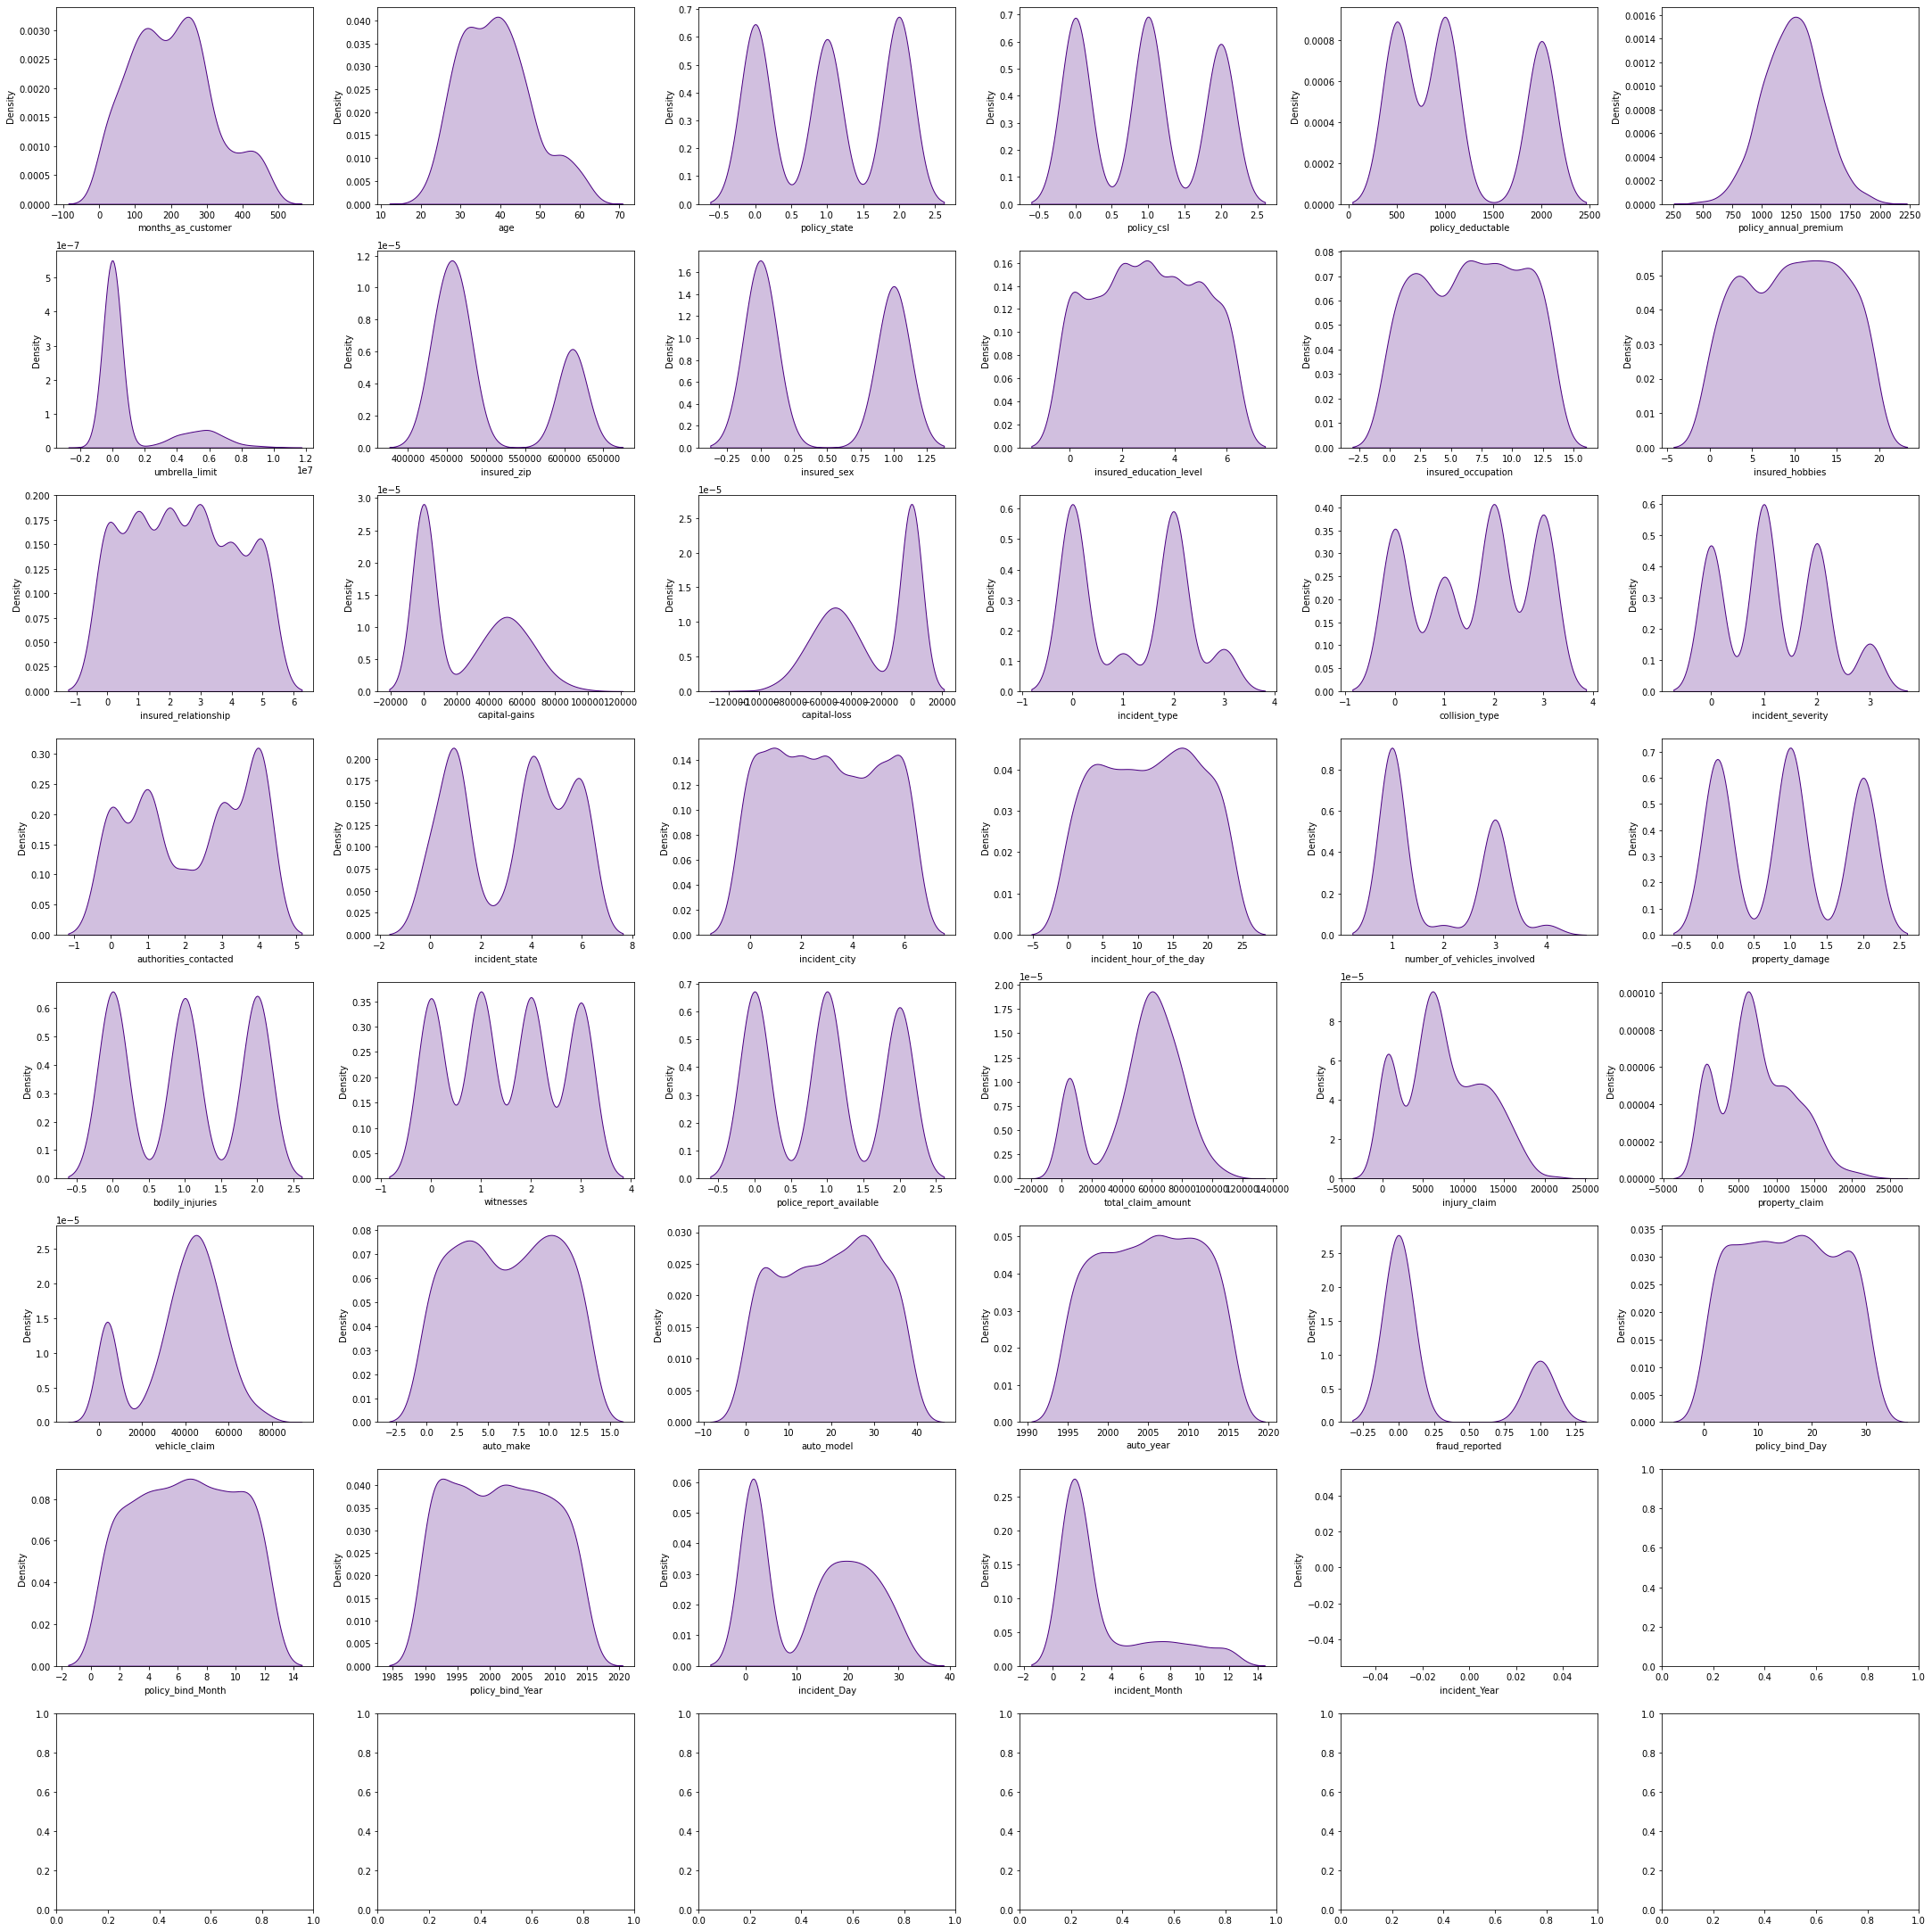

In [37]:
fig, ax = plt.subplots(ncols=6, nrows=8, figsize=(30,30))
index = 0
ax = ax.flatten()
for col, value in df[numerical_dtype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="indigo", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- With the help of distribution plot we can see the skewness details present in our numerical data columns which will need to be treated.

# Removing Outliers using zscore

In [38]:
from scipy.stats import zscore

# Using zscore to remove outliers

z=np.abs(zscore(df))

z

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
0,1.078140,0.990836,1.187173,0.060937,0.222383,0.616705,0.479476,0.489529,1.076953,0.530931,...,0.856466,1.645743,0.183440,1.746019,0.175451,1.015026,1.684992,1.141603,0.735040,NaN
1,0.208995,0.334073,0.016856,0.060937,1.412784,0.242521,1.697980,0.461008,1.076953,0.530931,...,0.360539,0.657470,0.315491,1.746019,1.305938,0.164894,0.597550,0.758386,0.735040,NaN
2,0.608002,1.088913,1.187173,1.182668,1.412784,0.642233,1.697980,0.984885,0.928546,1.557877,...,0.631315,0.959702,0.315491,0.572731,0.728938,0.164894,0.218032,0.854190,0.429664,NaN
3,0.452355,0.224613,1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,0.928546,1.557877,...,0.879279,1.319074,1.479664,1.746019,1.079841,0.459874,1.577335,1.157698,2.013343,NaN
4,0.208995,0.552994,1.220886,1.304542,0.222383,1.341980,2.133471,1.527808,1.076953,1.522961,...,1.623169,1.049545,0.648112,0.572731,1.068084,0.164894,1.684992,0.375169,0.429664,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.187173,1.304542,0.222383,0.222884,0.479476,0.975717,0.928546,1.044404,...,0.135388,1.196528,0.149180,0.572731,0.062403,0.130086,1.441405,0.854190,0.429664,NaN
996,0.704407,0.224613,1.220886,1.182668,0.222383,0.739141,0.479476,1.492519,0.928546,1.557877,...,1.600357,0.780016,1.645974,0.572731,1.633327,0.459874,1.684992,1.045799,0.735040,NaN
997,0.642767,0.541611,1.187173,0.060937,1.039966,0.520739,0.826998,0.815138,0.928546,1.044404,...,1.104430,0.028570,1.513924,0.572731,0.175451,1.344813,0.189759,0.949994,0.735040,NaN
998,2.208028,2.523284,1.220886,1.304542,1.412784,0.411866,1.697980,0.830250,1.076953,1.522961,...,1.375206,1.286371,1.181303,0.572731,0.288500,1.310006,1.277201,1.237407,0.429664,NaN


In [39]:
new_df = df[(z<3).all(axis=1)] 
new_df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year


In [40]:
#checking % of data loss
((1000-0)/1000)*100

100.0

##### I will not be using zscore as i am geeting 0 rows and 100% data loss when I perform zscore method.

# Using Log Transform to fix skewness

In [41]:
for col in numerical_dtype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical datatype columns to ensure that we do not have skewness in our dataset.

# Correlation using a Heatmap

In [42]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.004863,0.018498,0.060925,-0.000833,...,0.047655,0.004202,-0.000292,0.020544,0.051728,0.005750,-0.048276,-0.011092,0.023773,NaN
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.000464,0.025316,0.073337,0.000969,...,0.030410,0.017343,0.001354,0.012143,0.053869,0.015501,-0.037444,-0.006131,0.021421,NaN
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.017753,0.009510,-0.020481,-0.034327,...,0.017124,-0.025253,0.002114,0.029432,0.002277,0.071450,-0.007276,0.014745,0.023077,NaN
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.014882,0.006773,-0.010757,0.009153,...,-0.004701,0.047885,-0.033082,-0.037190,0.018973,-0.045345,-0.016466,-0.004156,-0.029392,NaN
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,-0.000927,0.003487,-0.009733,0.015217,...,-0.035379,-0.003268,0.026105,0.014817,0.009164,-0.050416,-0.049598,-0.018160,-0.001835,NaN
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.001075,0.032429,0.038853,-0.019715,...,0.000045,-0.031849,-0.049226,-0.014480,-0.025183,-0.035355,0.001249,0.014835,0.010227,NaN
umbrella_limit,0.004863,0.000464,-0.017753,0.014882,-0.000927,-0.001075,1.000000,0.006503,0.015186,-0.018075,...,0.007541,0.028914,0.006063,0.059523,-0.041509,0.002656,0.058028,-0.036080,0.046886,NaN
insured_zip,0.018498,0.025316,0.009510,0.006773,0.003487,0.032429,0.006503,1.000000,-0.037524,0.015869,...,-0.021479,0.023524,-0.032903,0.022039,-0.040606,0.016415,-0.000572,0.019257,-0.003302,NaN
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.015186,-0.037524,1.000000,0.009002,...,0.026457,-0.018421,-0.028247,0.030873,0.040713,-0.004033,-0.032891,-0.007280,0.024396,NaN
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.018075,0.015869,0.009002,1.000000,...,0.055202,0.049445,0.043509,0.008808,0.012610,-0.007118,0.018952,-0.058104,0.076592,NaN


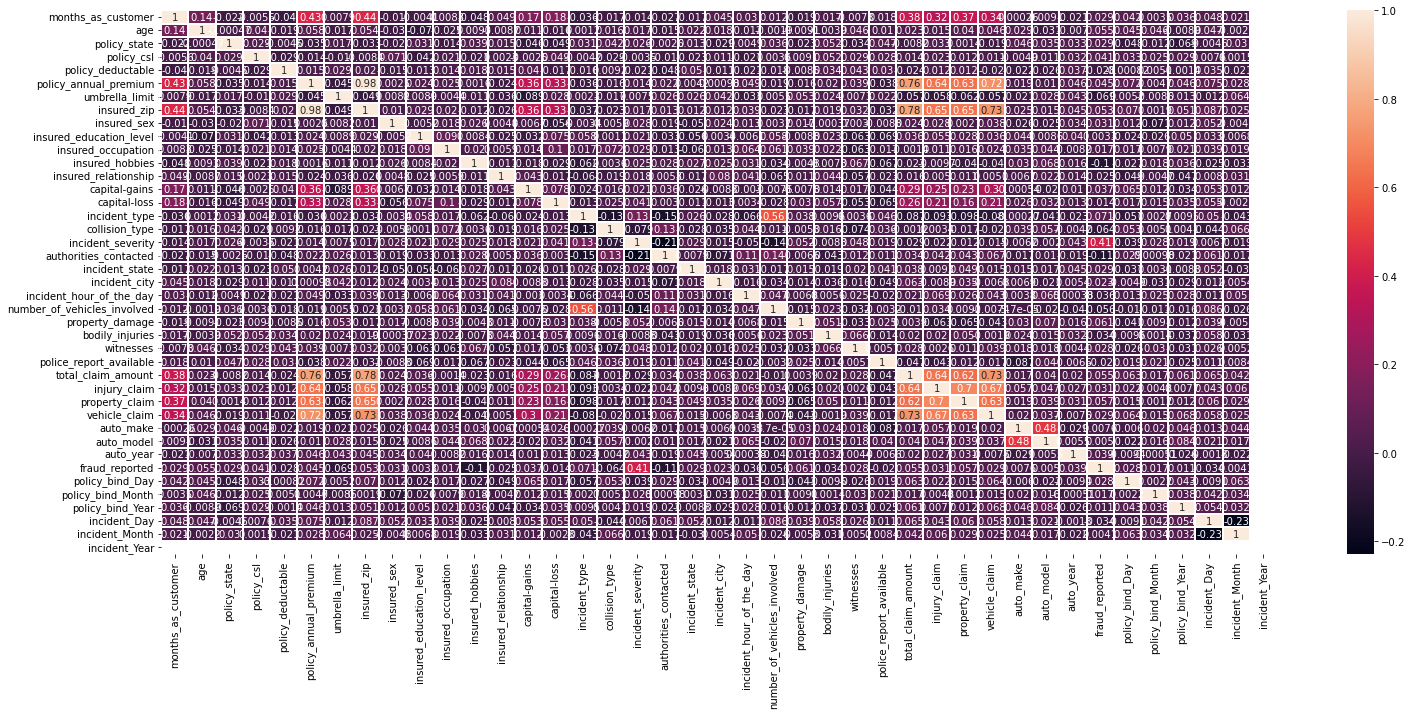

In [43]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2)

- We can see that some columns are multi collinear.

<AxesSubplot:>

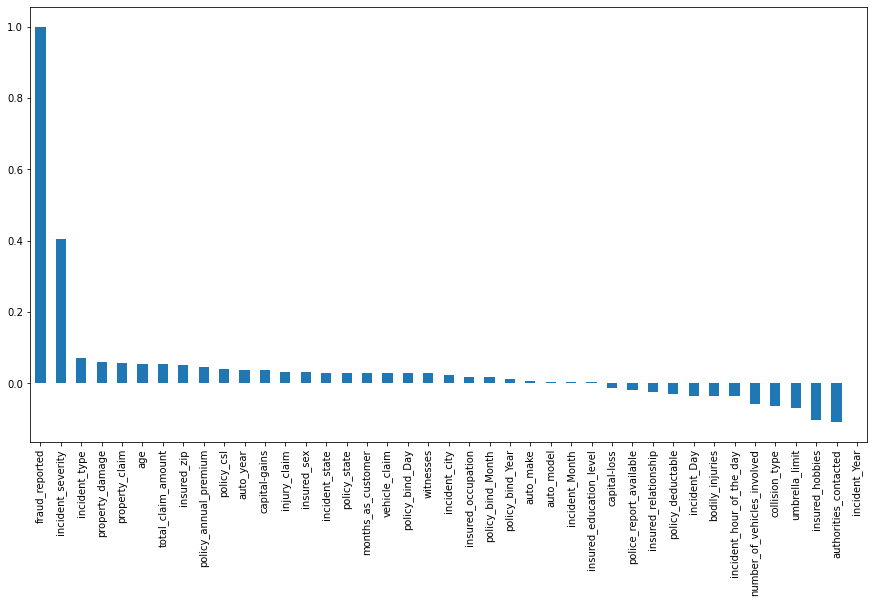

In [44]:
#Plotting correlation of target variables with other columns:

plt.figure(figsize=(15,8))
corr['fraud_reported'].sort_values(ascending = False).plot(kind='bar')

- We can see that incident year has no correlation with our target variable and also it has NaN values, so we will drop columns with nan values.

In [45]:
df.dropna(inplace=True)

# Data Visualization

#### countplot

- months_as_customer vs fraud_reported


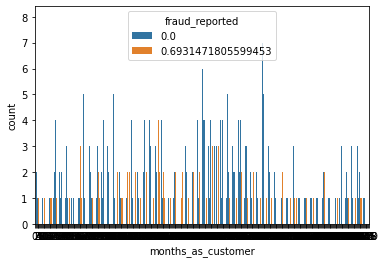

<Figure size 1080x504 with 0 Axes>

- age vs fraud_reported


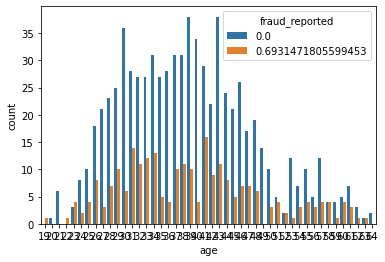

<Figure size 1080x504 with 0 Axes>

- policy_state vs fraud_reported


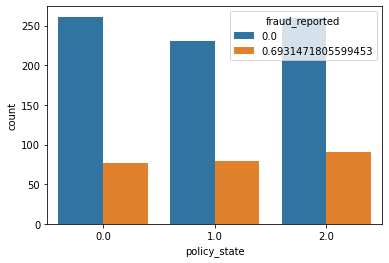

<Figure size 1080x504 with 0 Axes>

- policy_csl vs fraud_reported


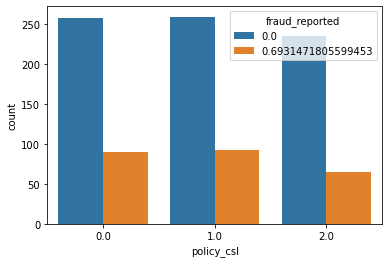

<Figure size 1080x504 with 0 Axes>

- policy_deductable vs fraud_reported


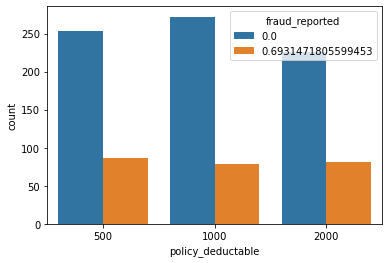

<Figure size 1080x504 with 0 Axes>

- policy_annual_premium vs fraud_reported


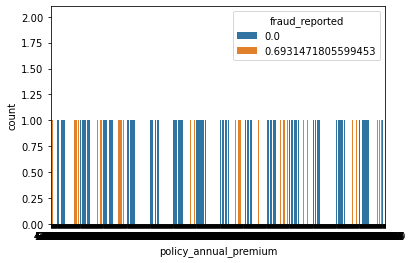

<Figure size 1080x504 with 0 Axes>

- umbrella_limit vs fraud_reported


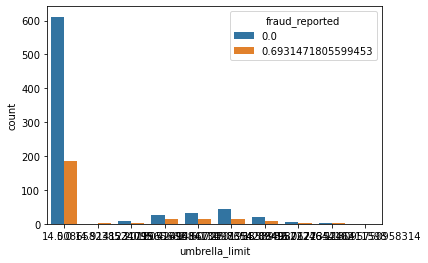

<Figure size 1080x504 with 0 Axes>

- insured_zip vs fraud_reported


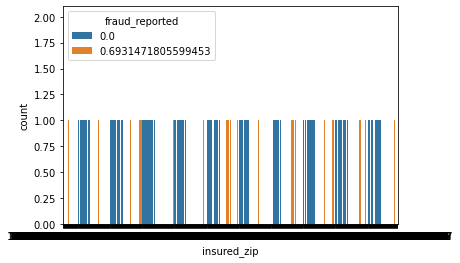

<Figure size 1080x504 with 0 Axes>

- insured_sex vs fraud_reported


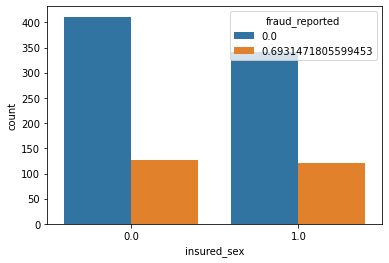

<Figure size 1080x504 with 0 Axes>

- insured_education_level vs fraud_reported


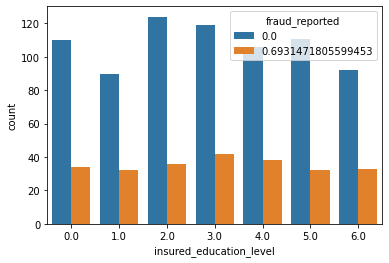

<Figure size 1080x504 with 0 Axes>

- insured_occupation vs fraud_reported


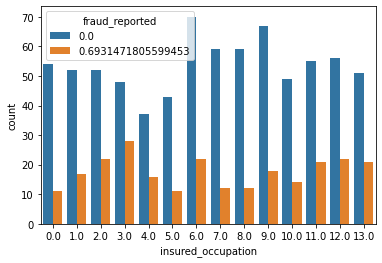

<Figure size 1080x504 with 0 Axes>

- insured_hobbies vs fraud_reported


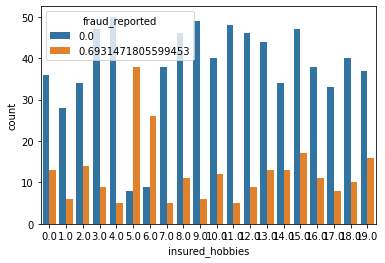

<Figure size 1080x504 with 0 Axes>

- insured_relationship vs fraud_reported


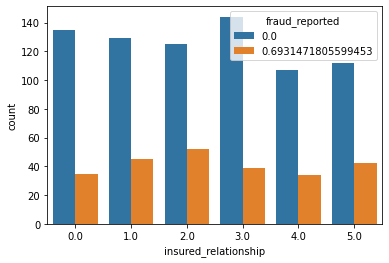

<Figure size 1080x504 with 0 Axes>

- capital-gains vs fraud_reported


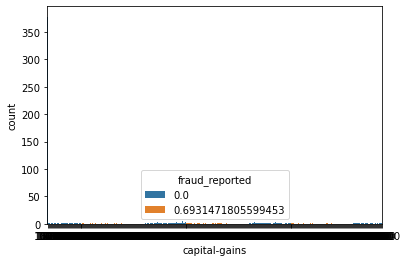

<Figure size 1080x504 with 0 Axes>

- capital-loss vs fraud_reported


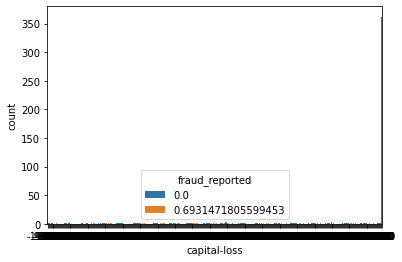

<Figure size 1080x504 with 0 Axes>

- incident_type vs fraud_reported


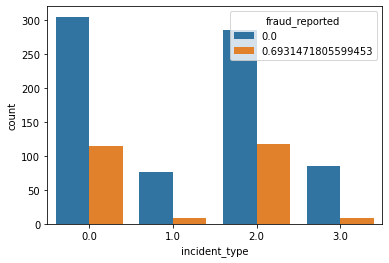

<Figure size 1080x504 with 0 Axes>

- collision_type vs fraud_reported


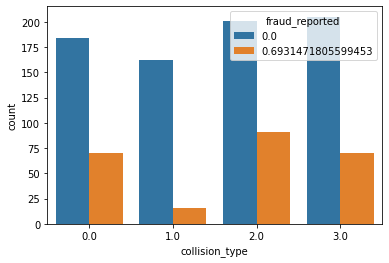

<Figure size 1080x504 with 0 Axes>

- incident_severity vs fraud_reported


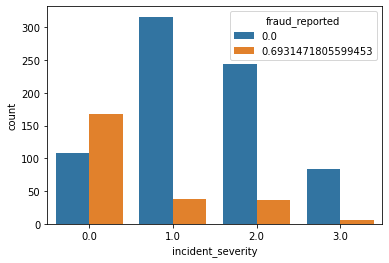

<Figure size 1080x504 with 0 Axes>

- authorities_contacted vs fraud_reported


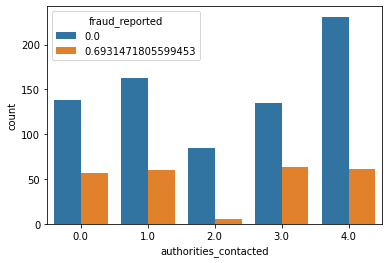

<Figure size 1080x504 with 0 Axes>

- incident_state vs fraud_reported


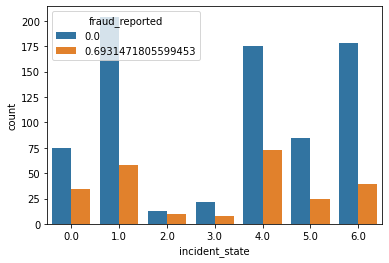

<Figure size 1080x504 with 0 Axes>

- incident_city vs fraud_reported


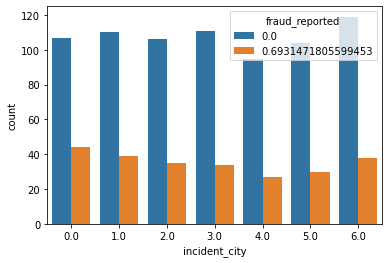

<Figure size 1080x504 with 0 Axes>

- incident_hour_of_the_day vs fraud_reported


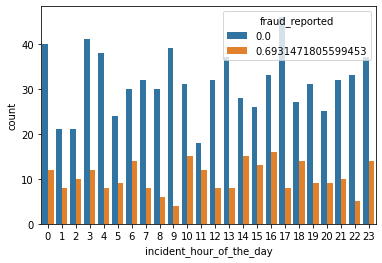

<Figure size 1080x504 with 0 Axes>

- number_of_vehicles_involved vs fraud_reported


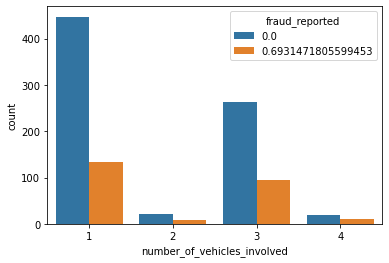

<Figure size 1080x504 with 0 Axes>

- property_damage vs fraud_reported


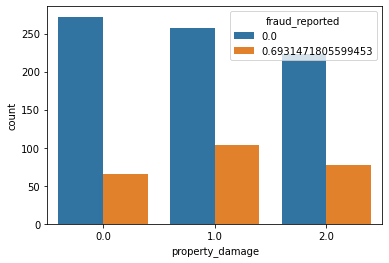

<Figure size 1080x504 with 0 Axes>

- bodily_injuries vs fraud_reported


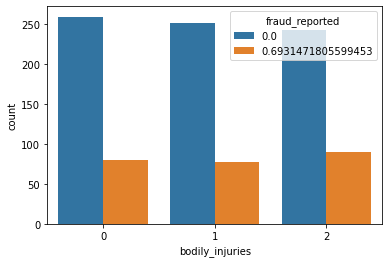

<Figure size 1080x504 with 0 Axes>

- witnesses vs fraud_reported


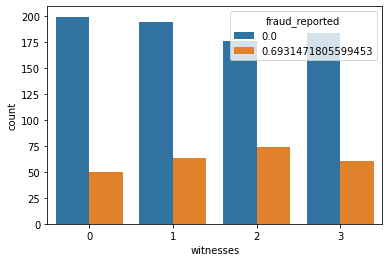

<Figure size 1080x504 with 0 Axes>

- police_report_available vs fraud_reported


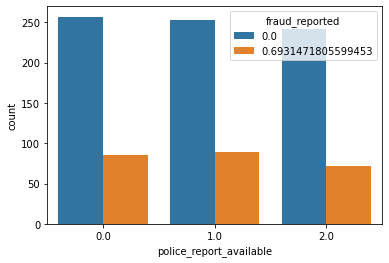

<Figure size 1080x504 with 0 Axes>

- total_claim_amount vs fraud_reported


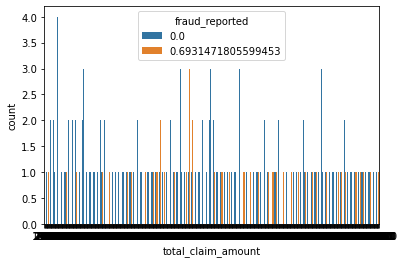

<Figure size 1080x504 with 0 Axes>

- injury_claim vs fraud_reported


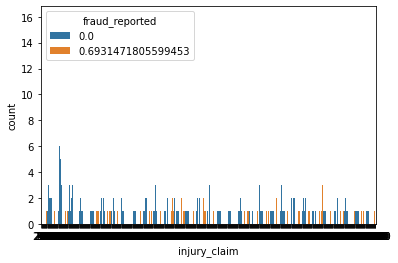

<Figure size 1080x504 with 0 Axes>

- property_claim vs fraud_reported


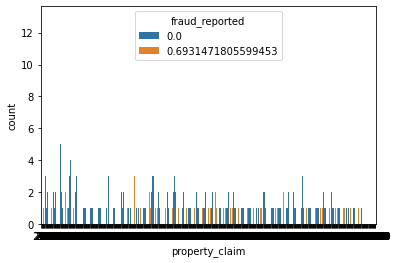

<Figure size 1080x504 with 0 Axes>

- vehicle_claim vs fraud_reported


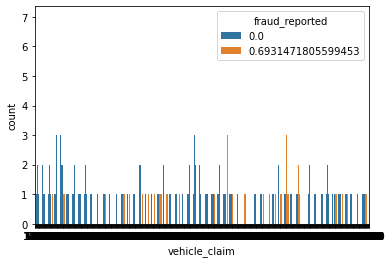

<Figure size 1080x504 with 0 Axes>

- auto_make vs fraud_reported


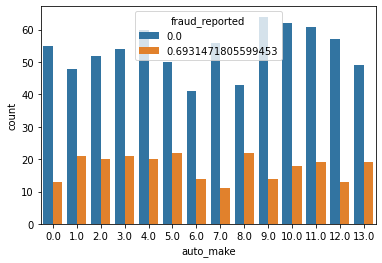

<Figure size 1080x504 with 0 Axes>

- auto_model vs fraud_reported


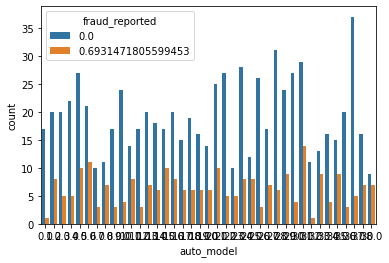

<Figure size 1080x504 with 0 Axes>

- auto_year vs fraud_reported


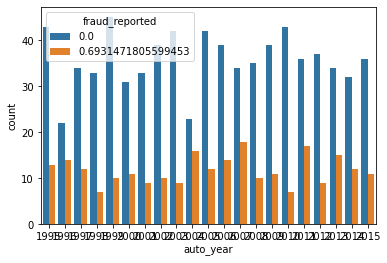

<Figure size 1080x504 with 0 Axes>

- fraud_reported vs fraud_reported


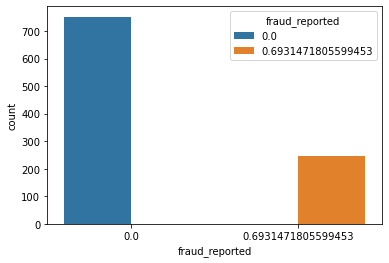

<Figure size 1080x504 with 0 Axes>

- policy_bind_Day vs fraud_reported


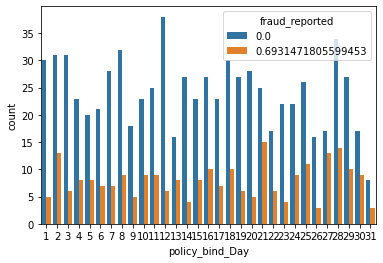

<Figure size 1080x504 with 0 Axes>

- policy_bind_Month vs fraud_reported


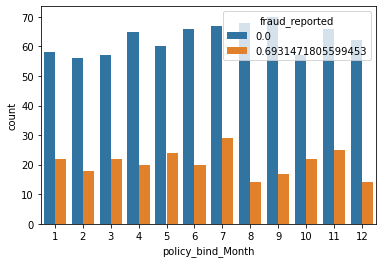

<Figure size 1080x504 with 0 Axes>

- policy_bind_Year vs fraud_reported


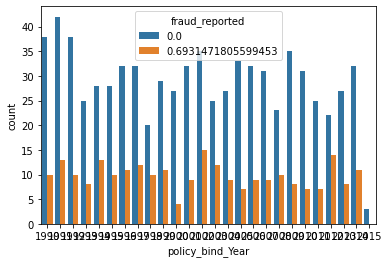

<Figure size 1080x504 with 0 Axes>

- incident_Day vs fraud_reported


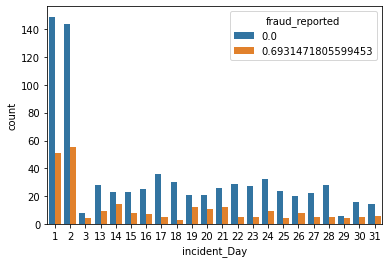

<Figure size 1080x504 with 0 Axes>

- incident_Month vs fraud_reported


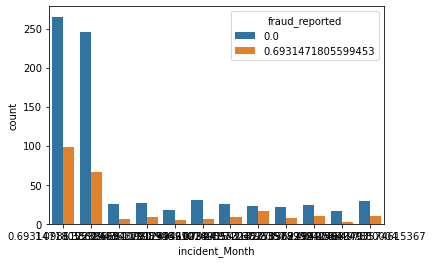

<Figure size 1080x504 with 0 Axes>

- incident_Year vs fraud_reported


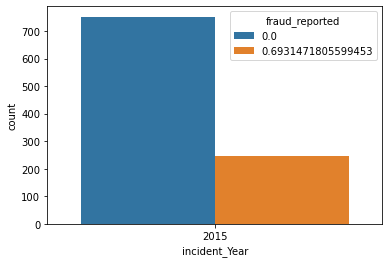

<Figure size 1080x504 with 0 Axes>

In [46]:
for col in numerical_dtype:
    print("-",col,"vs fraud_reported")
    ax=sns.countplot(x=str(col), hue='fraud_reported',data = df)
    plt.figure(figsize=(15,7))
    (ax,df.months_as_customer,1,1)
    plt.tight_layout()
    plt.show()

- Above count plot shows us the count of each column with respect to 'fraud_reported'

#### Pie Chart

Single digit category column name: fraud_reported


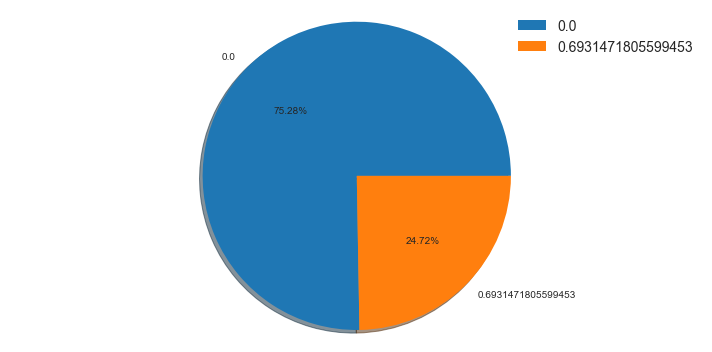

Single digit category column name: insured_sex


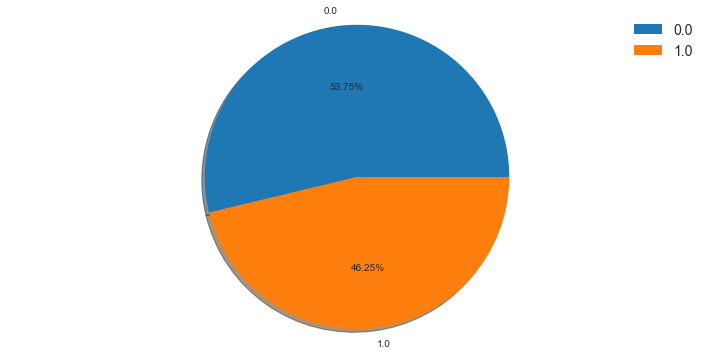

Single digit category column name: policy_state


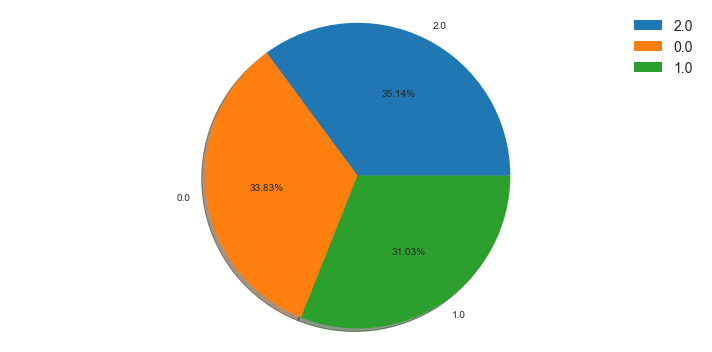

Single digit category column name: policy_csl


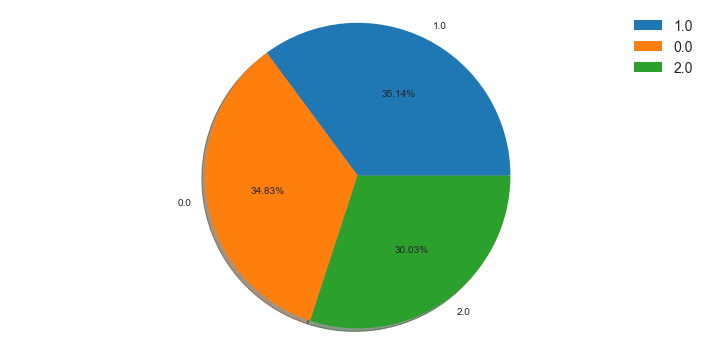

Single digit category column name: policy_deductable


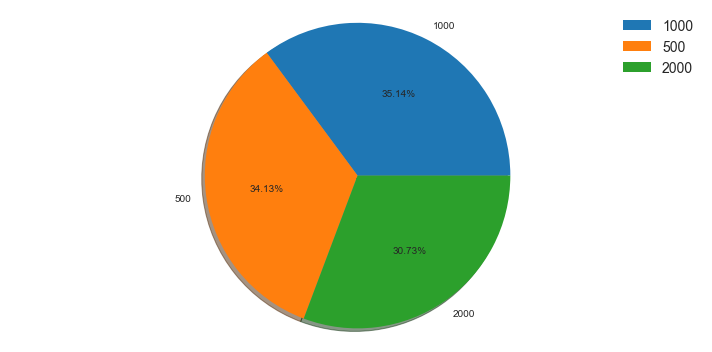

Single digit category column name: bodily_injuries


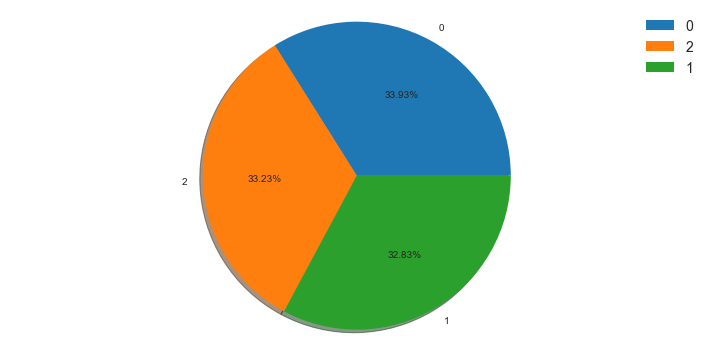

Single digit category column name: police_report_available


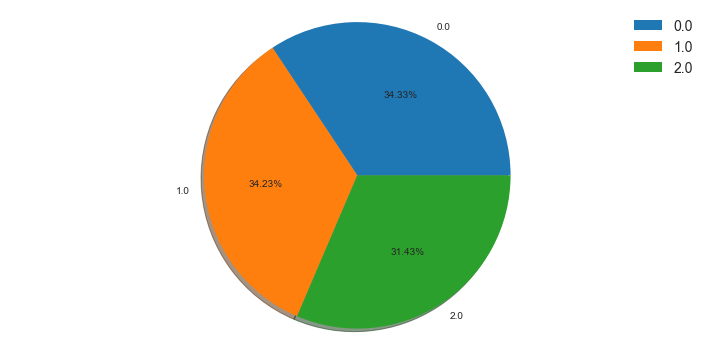

Single digit category column name: property_damage


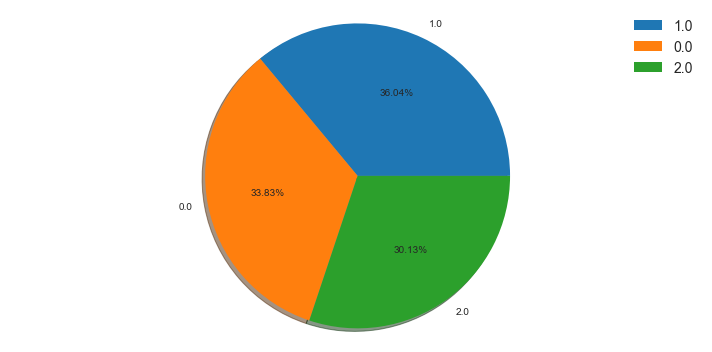

Single digit category column name: incident_type


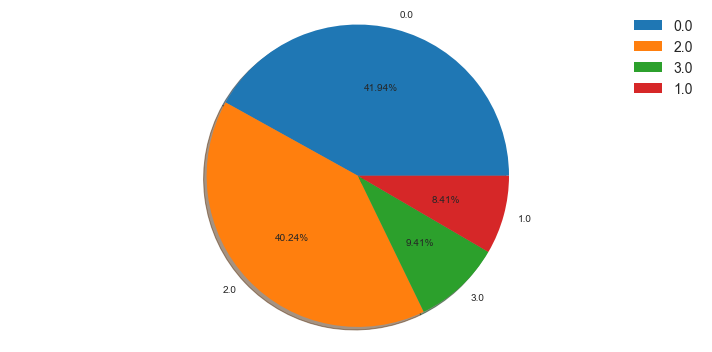

Single digit category column name: collision_type


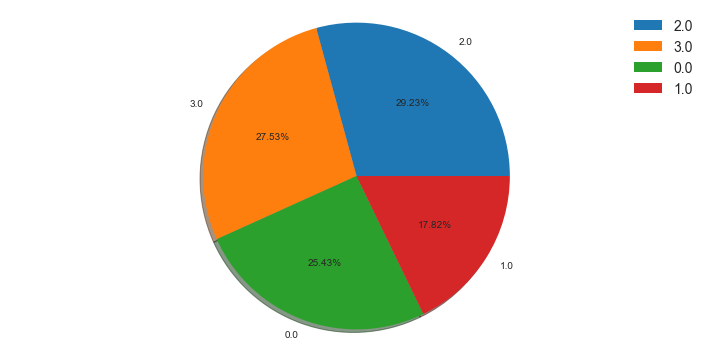

Single digit category column name: incident_severity


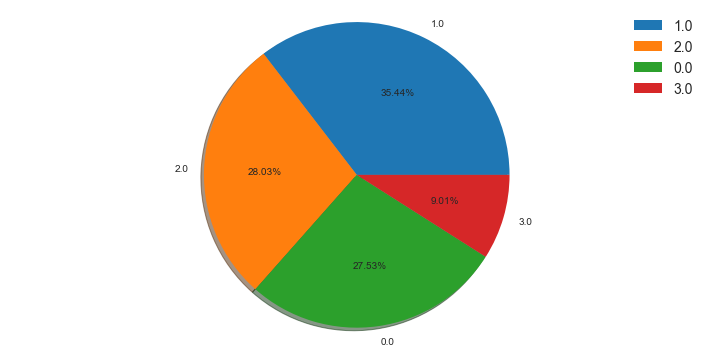

Single digit category column name: number_of_vehicles_involved


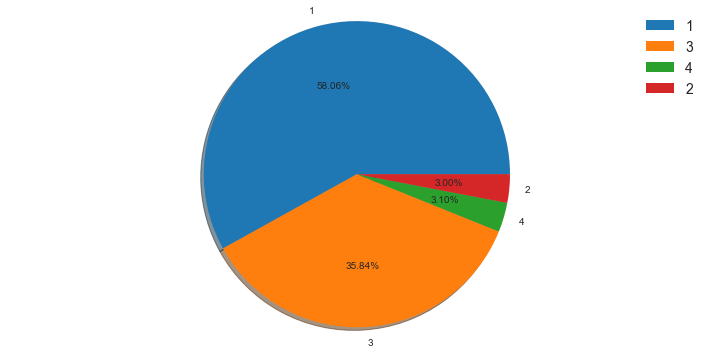

Single digit category column name: witnesses


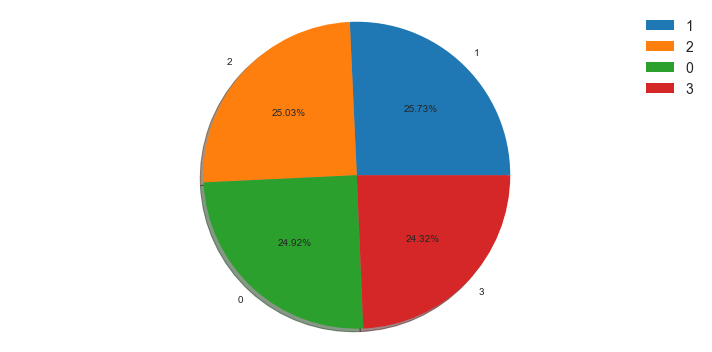

Single digit category column name: authorities_contacted


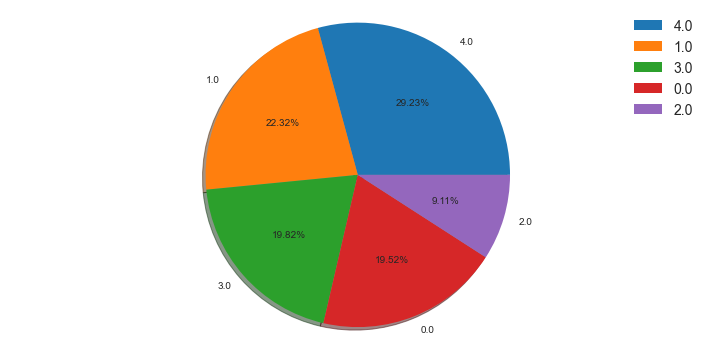

Single digit category column name: insured_relationship


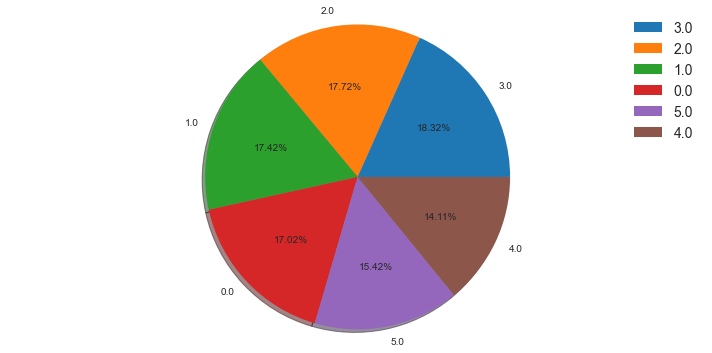

Single digit category column name: insured_education_level


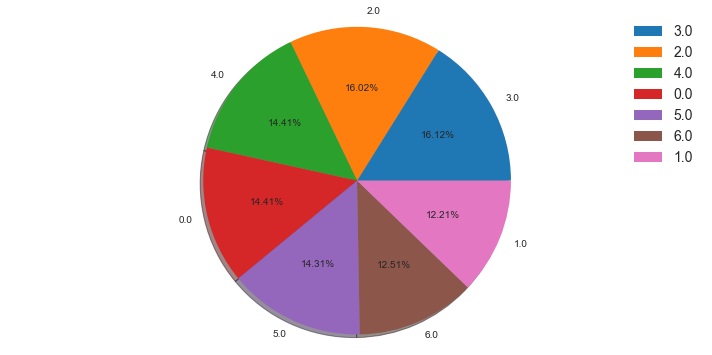

Single digit category column name: incident_state


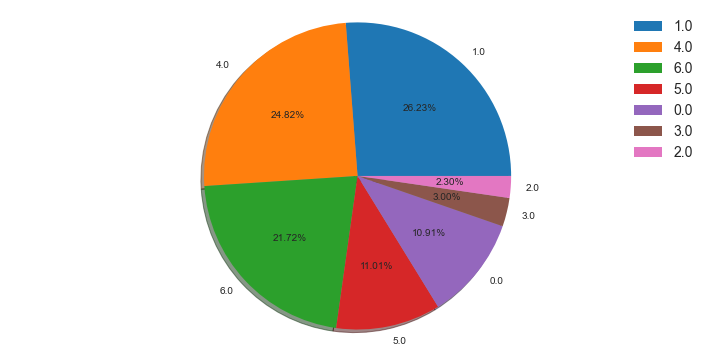

Single digit category column name: incident_city


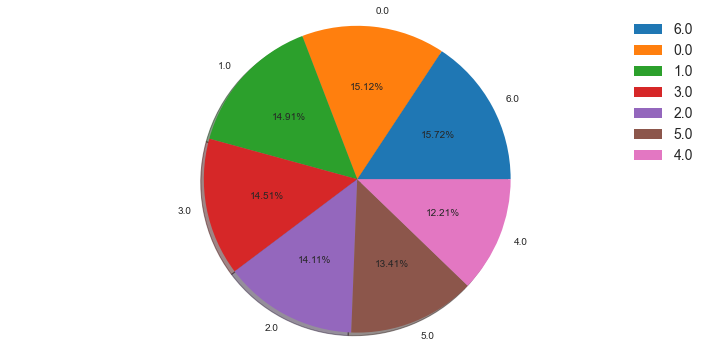

In [47]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

col1 = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in df[col1]:
    print(f"Single digit category column name:", i)
    generate_pie(df[i])

#### Scatterplot

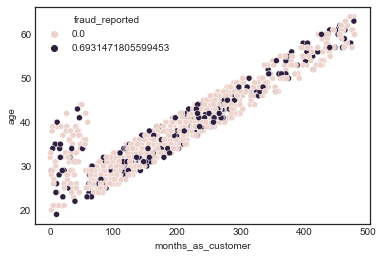

In [48]:
sns.scatterplot(x = "months_as_customer", y = "age" ,hue='fraud_reported', data = df)
plt.show()

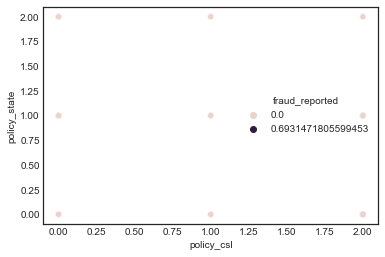

In [49]:
sns.scatterplot(x = "policy_csl", y = "policy_state" ,hue='fraud_reported', data = df)
plt.show()

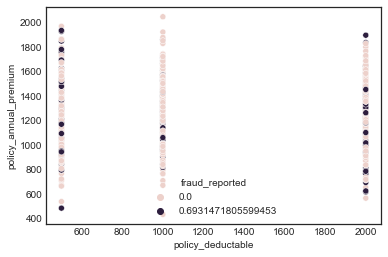

In [50]:
sns.scatterplot(x = "policy_deductable", y = "policy_annual_premium" ,hue='fraud_reported', data = df)
plt.show()

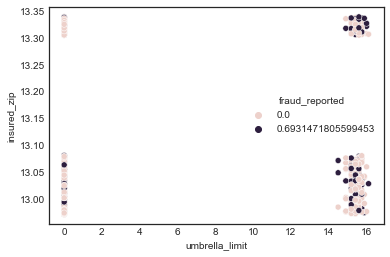

In [51]:
sns.scatterplot(x = "umbrella_limit", y = "insured_zip" ,hue='fraud_reported', data = df)
plt.show()

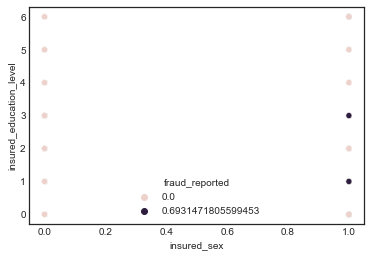

In [52]:
sns.scatterplot(x = "insured_sex", y = "insured_education_level" ,hue='fraud_reported', data = df)
plt.show()

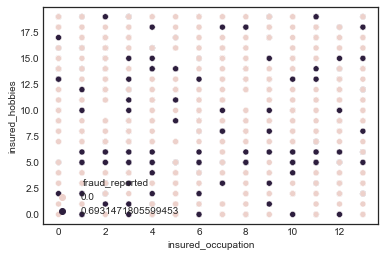

In [53]:
sns.scatterplot(x = "insured_occupation", y = "insured_hobbies" ,hue='fraud_reported', data = df)
plt.show()

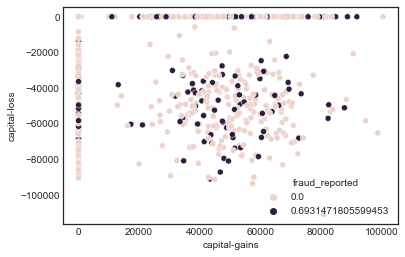

In [54]:
sns.scatterplot(x = "capital-gains", y = "capital-loss" ,hue='fraud_reported', data = df)
plt.show()

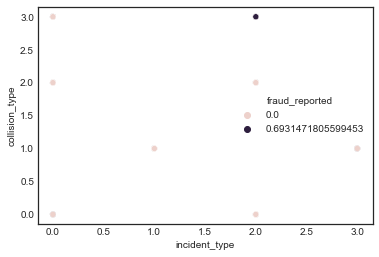

In [55]:
sns.scatterplot(x = "incident_type", y = "collision_type" ,hue='fraud_reported', data = df)
plt.show()

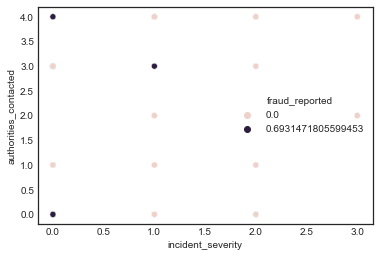

In [56]:
sns.scatterplot(x = "incident_severity", y = "authorities_contacted" ,hue='fraud_reported', data = df)
plt.show()

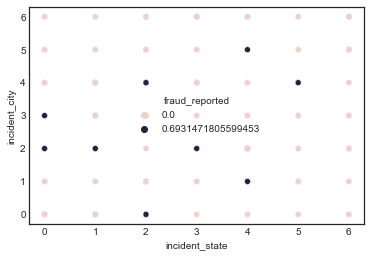

In [57]:
sns.scatterplot(x = "incident_state", y = "incident_city" ,hue='fraud_reported', data = df)
plt.show()

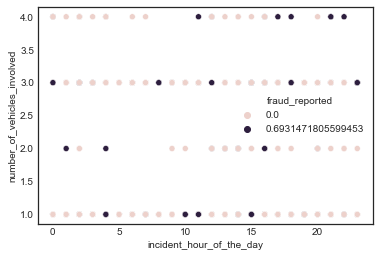

In [58]:
sns.scatterplot(x = "incident_hour_of_the_day", y = "number_of_vehicles_involved" ,hue='fraud_reported', data = df)
plt.show()

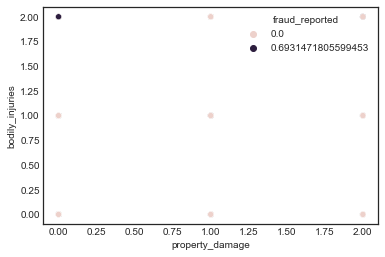

In [59]:
sns.scatterplot(x = "property_damage", y = "bodily_injuries" ,hue='fraud_reported', data = df)
plt.show()

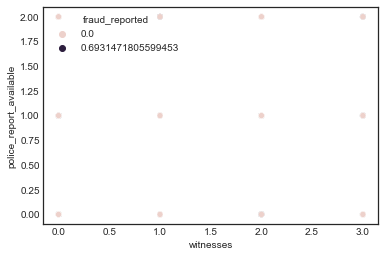

In [60]:
sns.scatterplot(x = "witnesses", y = "police_report_available" ,hue='fraud_reported', data = df)
plt.show()

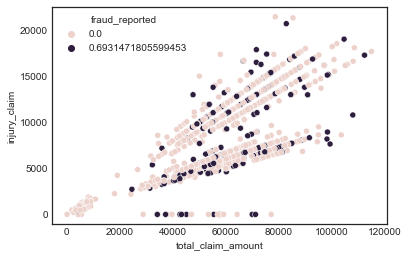

In [61]:
sns.scatterplot(x = "total_claim_amount", y = "injury_claim" ,hue='fraud_reported', data = df)
plt.show()

#### Barplot

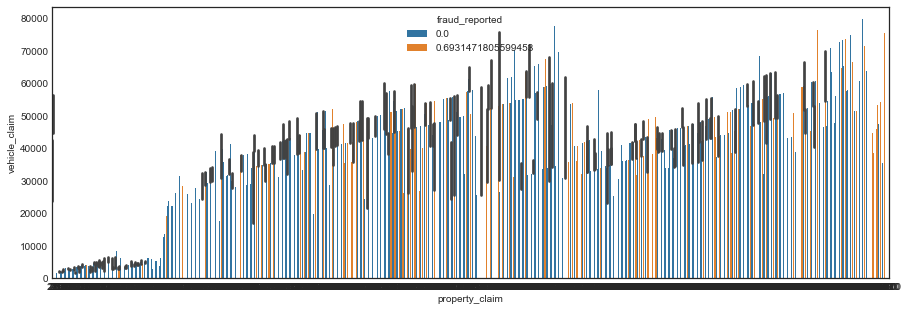

In [62]:
plt.figure(figsize = (15,5))
sns.barplot(x = "property_claim", y = "vehicle_claim", data = df ,hue='fraud_reported')
plt.show()

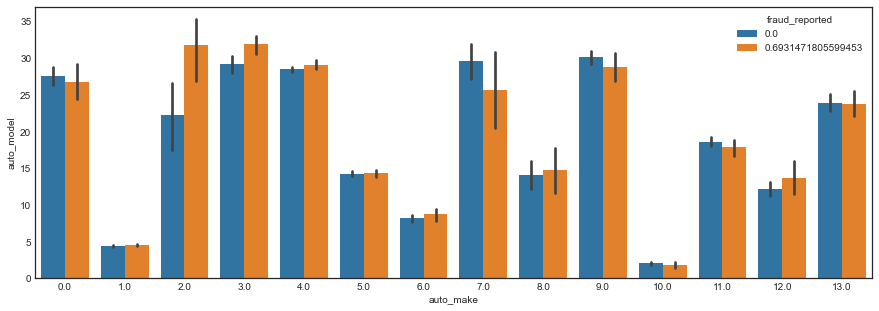

In [63]:
plt.figure(figsize = (15,5))
sns.barplot(x = "auto_make", y = "auto_model", data = df ,hue='fraud_reported')
plt.show()

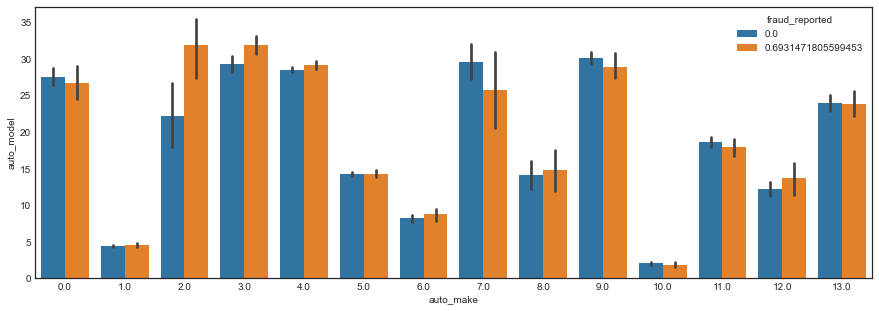

In [64]:
plt.figure(figsize = (15,5))
sns.barplot(x = "auto_make", y = "auto_model", data = df ,hue='fraud_reported')
plt.show()

#### Distribution plot

In [65]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
0,328,48,2.0,1.0,1000,1406.91,0.000000,13.052226,1.0,4.0,...,10.0,1.0,2004,0.693147,17,10,2014,25,0.693147,2015
1,228,42,1.0,1.0,2000,1197.22,15.424949,13.056602,1.0,4.0,...,8.0,12.0,2007,0.693147,27,6,2006,21,0.693147,2015
2,134,29,2.0,0.0,2000,1413.14,15.424949,12.973011,0.0,6.0,...,4.0,30.0,2007,0.000000,9,6,2000,22,1.098612,2015
3,256,41,0.0,1.0,2000,1415.74,15.607270,13.318124,0.0,6.0,...,3.0,34.0,2014,0.693147,25,5,1990,1,2.397895,2015
4,228,44,0.0,2.0,1000,1583.91,15.607270,13.322373,1.0,0.0,...,0.0,31.0,2009,0.000000,6,6,2014,17,1.098612,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0.000000,12.974536,0.0,5.0,...,6.0,6.0,2006,0.000000,16,7,1991,22,1.098612,2015
996,285,41,0.0,0.0,1000,1436.79,0.000000,13.318223,0.0,6.0,...,13.0,28.0,2015,0.000000,1,5,2014,24,0.693147,2015
997,130,34,2.0,1.0,500,1383.49,14.914123,13.000869,0.0,5.0,...,11.0,19.0,1996,0.000000,17,2,2003,23,0.693147,2015
998,458,62,0.0,2.0,2000,1356.92,15.424949,12.998420,1.0,0.0,...,1.0,5.0,1998,0.000000,18,11,2011,26,1.098612,2015


<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

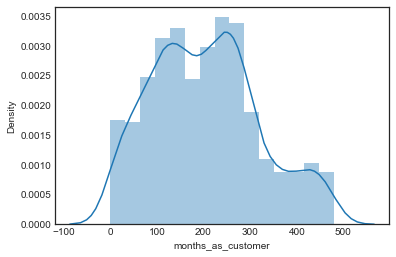

In [66]:
sns.distplot(df['months_as_customer'])

<AxesSubplot:xlabel='age', ylabel='Density'>

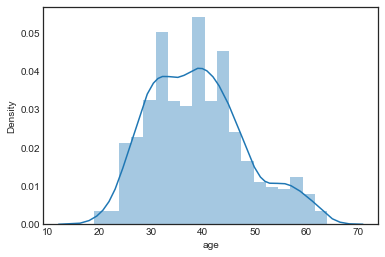

In [67]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='policy_state', ylabel='Density'>

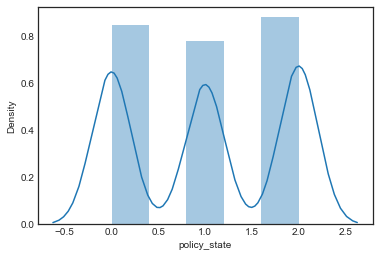

In [68]:
sns.distplot(df['policy_state'])

<AxesSubplot:xlabel='policy_csl', ylabel='Density'>

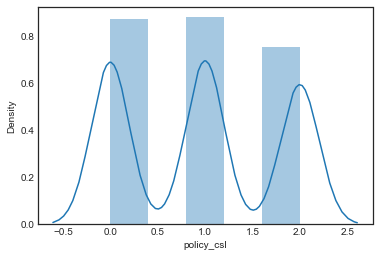

In [69]:
sns.distplot(df['policy_csl'])

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

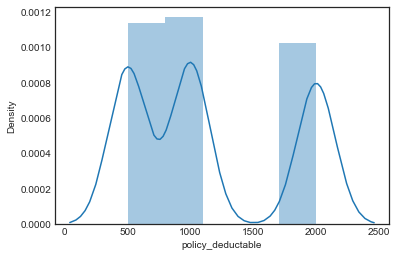

In [70]:
sns.distplot(df['policy_deductable'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

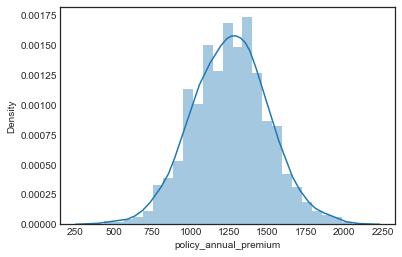

In [71]:
sns.distplot(df['policy_annual_premium'])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

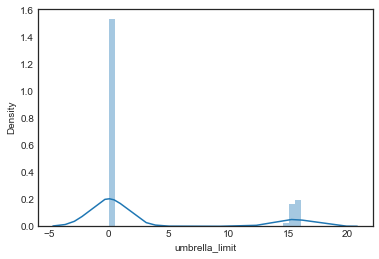

In [72]:
sns.distplot(df['umbrella_limit'])

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

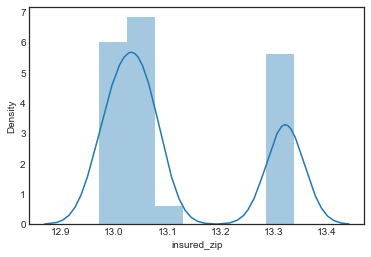

In [73]:
sns.distplot(df['insured_zip'])

<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

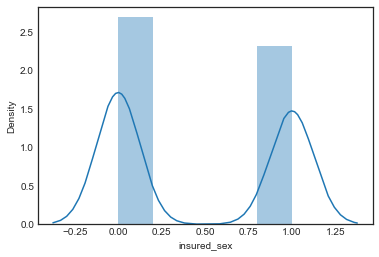

In [74]:
sns.distplot(df['insured_sex'])

<AxesSubplot:xlabel='insured_education_level', ylabel='Density'>

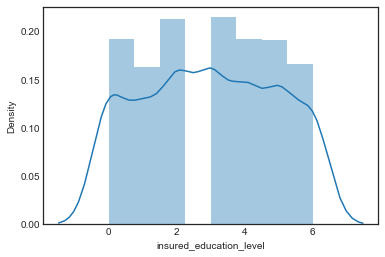

In [75]:
sns.distplot(df['insured_education_level'])

<AxesSubplot:xlabel='auto_make', ylabel='Density'>

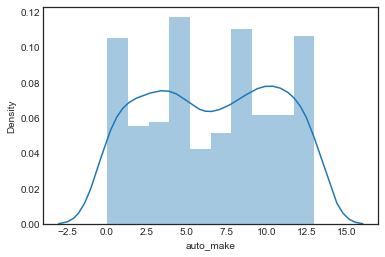

In [76]:
sns.distplot(df['auto_make'])

<AxesSubplot:xlabel='auto_model', ylabel='Density'>

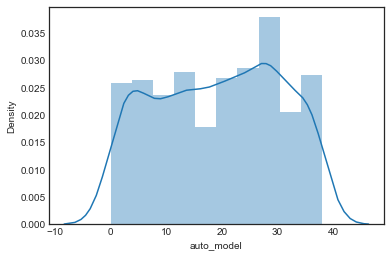

In [77]:
sns.distplot(df['auto_model'])

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

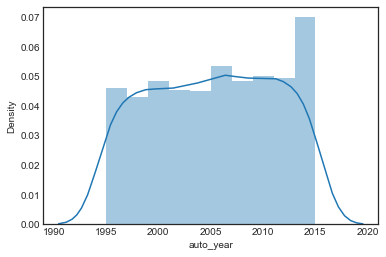

In [78]:
sns.distplot(df['auto_year'])

<AxesSubplot:xlabel='policy_bind_Day', ylabel='Density'>

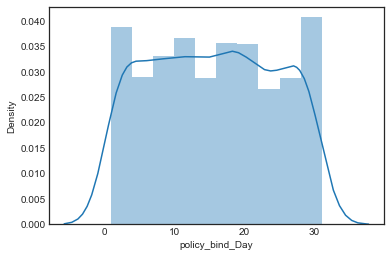

In [79]:
sns.distplot(df['policy_bind_Day'])

<AxesSubplot:xlabel='policy_bind_Month', ylabel='Density'>

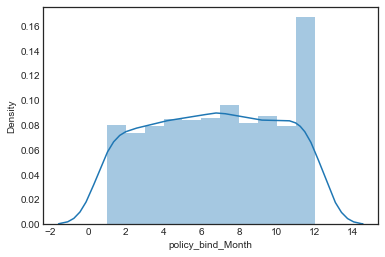

In [80]:
sns.distplot(df['policy_bind_Month'])

<AxesSubplot:xlabel='policy_bind_Year', ylabel='Density'>

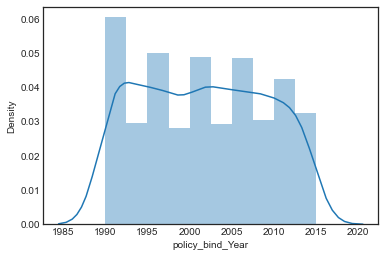

In [81]:
sns.distplot(df['policy_bind_Year'])

<AxesSubplot:xlabel='incident_Day', ylabel='Density'>

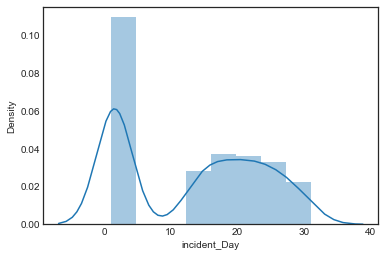

In [82]:
sns.distplot(df['incident_Day'])

<AxesSubplot:xlabel='incident_Month', ylabel='Density'>

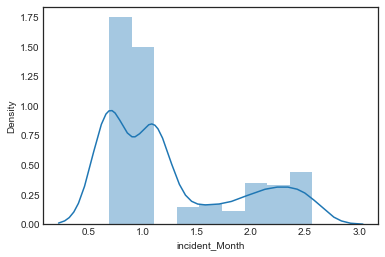

In [83]:
sns.distplot(df['incident_Month'])

<AxesSubplot:xlabel='incident_Year', ylabel='Density'>

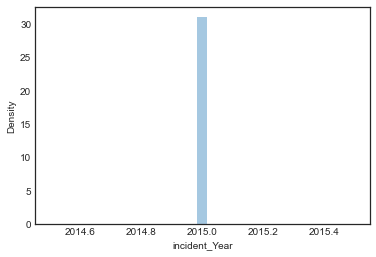

In [84]:
sns.distplot(df['incident_Year'])

#### Histogram

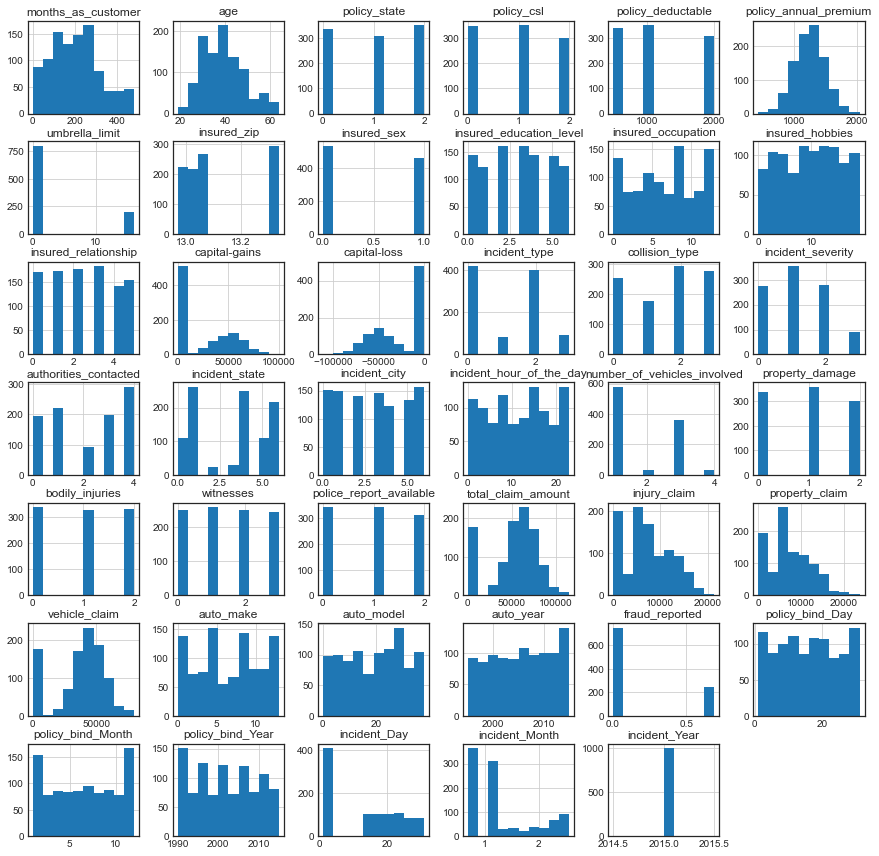

In [85]:
df.hist(figsize=(15,15))
plt.show()

# Seperating Label "Y" and Features "X"

In [90]:
X = df.drop('fraud_reported', axis=1)
Y = df['fraud_reported']

### Checking imbalance

In [91]:
Y.value_counts()

0    752
1    247
Name: fraud_reported, dtype: int64

- The value count of our target variable is imbalanced, we will now oversample it by using smote

In [92]:
import imblearn

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,Y = SM.fit_resample(X,Y)

In [93]:
Y.value_counts()

1    752
0    752
Name: fraud_reported, dtype: int64

- Now our data is balances in our target column.

# Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
0,1.101932,1.033932,1.257660,0.102626,-0.232006,0.671608,-0.554058,-0.508771,1.081592,0.526646,...,0.699954,0.921387,-1.726830,-0.163051,0.161745,1.114762,1.835630,1.267869,-0.997724,0.0
1,0.191869,0.349799,-0.020219,0.102626,1.485786,-0.227900,2.074860,-0.474562,1.081592,0.526646,...,-2.021688,0.394988,-0.675701,0.365839,1.352471,-0.139945,0.670679,0.861805,-0.997724,0.0
2,-0.663589,-1.132488,1.257660,-1.224025,1.485786,0.698333,2.074860,-1.128106,-1.039133,1.621411,...,-0.923953,-0.657810,1.044327,0.365839,-0.790835,-0.139945,-0.203034,0.963321,-0.306126,0.0
3,0.446687,0.235777,-1.298098,0.102626,1.485786,0.709486,2.105933,1.570130,-1.039133,1.621411,...,0.623745,-0.921009,1.426555,1.599915,1.114326,-0.453621,-1.659222,-1.168513,1.910049,0.0
4,0.191869,0.577843,-1.298098,1.429278,-0.232006,1.430885,2.105933,1.603346,1.081592,-1.662883,...,-1.963411,-1.710608,1.139884,0.718432,-1.148052,-0.139945,1.835630,0.455742,-0.306126,0.0


# Checking VIF(Variance Inflation Factor) values:

In [95]:
#importing VIF from statsmodels:

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,7.399133e+00,months_as_customer
1,7.396499e+00,age
2,1.052947e+00,policy_state
3,1.047117e+00,policy_csl
4,1.058066e+00,policy_deductable
5,1.047082e+00,policy_annual_premium
6,1.048426e+00,umbrella_limit
7,1.048327e+00,insured_zip
8,1.045708e+00,insured_sex
9,1.069014e+00,insured_education_level


- We can see that all columns have VIF values less than 10 so we can proceed.

# Building Classification Model

In [112]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [113]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 79.25531914893617 on Random State 33


- We have got our best accuray score as 79.25% with random state as 33.

# Feature importance bar graph

,Importance
Features,
incident_severity,0.189
property_damage,0.042
insured_zip,0.041
insured_hobbies,0.040
authorities_contacted,0.033
property_claim,0.031
incident_state,0.031
vehicle_claim,0.028
total_claim_amount,0.027


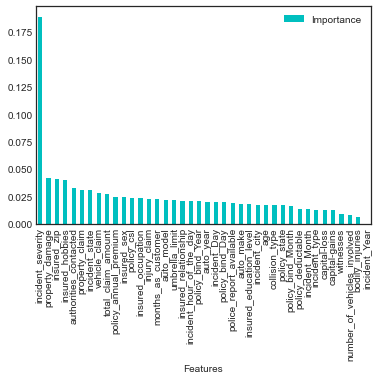

In [114]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='c')
importances

# Machine Learning Model for Classification with Evaluation Metrics

In [115]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=213)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [116]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       182
           1       0.75      0.77      0.76       194

    accuracy                           0.75       376
   macro avg       0.75      0.75      0.75       376
weighted avg       0.75      0.75      0.75       376

Accuracy Score: 74.7340425531915
Cross Validation Score: 73.54019933554817

Accuracy Score - Cross Validation Score is 1.1938432176433338


In [117]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       182
           1       0.88      0.79      0.83       194

    accuracy                           0.84       376
   macro avg       0.84      0.84      0.84       376
weighted avg       0.84      0.84      0.83       376

Accuracy Score: 83.51063829787235
Cross Validation Score: 84.18095238095239

Accuracy Score - Cross Validation Score is -0.6703140830800436


In [118]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       182
           1       0.82      0.82      0.82       194

    accuracy                           0.82       376
   macro avg       0.82      0.82      0.82       376
weighted avg       0.82      0.82      0.82       376

Accuracy Score: 81.64893617021278
Cross Validation Score: 82.31760797342193

Accuracy Score - Cross Validation Score is -0.6686718032091505


In [119]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       182
           1       0.88      0.85      0.86       194

    accuracy                           0.86       376
   macro avg       0.86      0.86      0.86       376
weighted avg       0.86      0.86      0.86       376

Accuracy Score: 86.17021276595744
Cross Validation Score: 85.77740863787375

Accuracy Score - Cross Validation Score is 0.39280412808369647


In [120]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.12      0.20       182
           1       0.54      0.98      0.70       194

    accuracy                           0.56       376
   macro avg       0.69      0.55      0.45       376
weighted avg       0.69      0.56      0.46       376

Accuracy Score: 56.11702127659575
Cross Validation Score: 56.78405315614617

Accuracy Score - Cross Validation Score is -0.6670318795504215


In [121]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       182
           1       0.89      0.88      0.88       194

    accuracy                           0.88       376
   macro avg       0.88      0.88      0.88       376
weighted avg       0.88      0.88      0.88       376

Accuracy Score: 88.03191489361703
Cross Validation Score: 89.3656699889258

Accuracy Score - Cross Validation Score is -1.3337550953087742


In [122]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       182
           1       0.88      0.89      0.89       194

    accuracy                           0.88       376
   macro avg       0.88      0.88      0.88       376
weighted avg       0.88      0.88      0.88       376

Accuracy Score: 88.29787234042553
Cross Validation Score: 87.50409745293466

Accuracy Score - Cross Validation Score is 0.7937748874908692


# Hyper parameter tuning on the best Classification ML Model

In [123]:
# Choosing XGB Classifier
parameters = {'booster' : ['ggbtree', 'gblinear'],
              'verbosity' : [0,1,2,3],
              'use_rmm' : ['True','False']
             }

In [125]:
GSCV = GridSearchCV(xgb.XGBClassifier(), parameters, cv=12)

In [126]:
GSCV.fit(X_train,Y_train)

[18:30:30] ======== Monitor (0): Learner ========
[18:30:30] ======== Monitor (0): Learner ========
[18:30:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/common/timer.cc:44: Timer for Configure did not get stopped properly.
[18:30:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/common/timer.cc:44: Timer for UpdateOneIter did not get stopped properly.
[18:30:30] ======== Monitor (0): Learner ========
[18:30:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/common/timer.cc:44: Timer for Configure did not get stopped properly.
[18:30:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/common/timer.cc:44: Timer for UpdateOneIter did not get stopped properly.
[18:30:30] ======== Monitor (0): Learner ========
[18:30:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/common/timer.cc:44: Timer for Configure did not get stopped properly.
[18:30:30] WARNIN

GridSearchCV(cv=12,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
   

In [127]:
# getting results

GSCV.best_params_

{'booster': 'gblinear', 'use_rmm': 'True', 'verbosity': 0}

In [129]:
Final_Model = xgb.XGBClassifier(booster = 'gblinear', use_rmm= 'True', verbosity= 0)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 75.2659574468085


# AUC ROC Curve

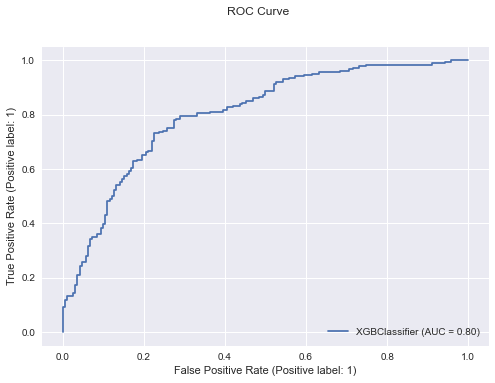

In [133]:
from sklearn import metrics

plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

- As per AUC-ROC curve we got an accuracy score as 80%

# Confusion Matrix

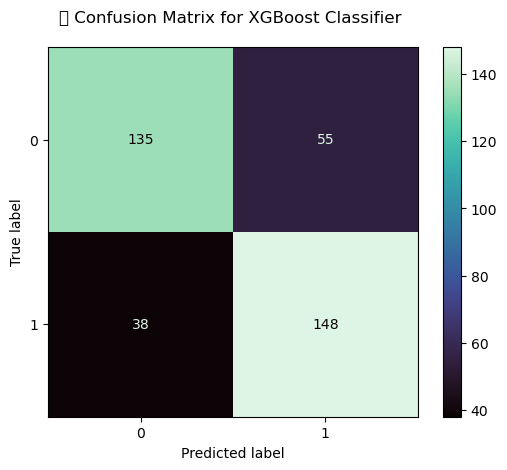

In [135]:
plt.style.use('default')

class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for XGBoost Classifier \n')
plt.show()

# Saving the model

In [136]:
import pickle

In [137]:
filename = "Final_Insurance_Claim_report.pkl"
pickle.dump(rf, open(filename,'wb'))

# Loading The Model

In [138]:
loadmodel = pickle.load(open('Final_Insurance_Claim_report.pkl', 'rb'))

In [139]:
a = np.array(Y_test)
pred = np.array(model.predict(X_test))
df_final = pd.DataFrame({"Original":a,"Predicted":pred},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,0
...,...,...
371,0,0
372,1,1
373,0,0
374,0,0


- The above dataframe has original and predicted data from the best model with accuracy score as 75%.